In [29]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [30]:
df = pd.read_csv('cleaned_wine_data.csv')
df.drop(['Unnamed: 0'], axis=1, inplace=True)

df['quality'].replace(0, 'bad', inplace=True)
df['quality'].replace(1, 'good', inplace=True)

C:\Users\tommy\AppData\Local\Temp\ipykernel_36604\2335780844.py:4: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['quality'].replace(0, 'bad', inplace=True)


In [31]:
df.head()

fixed acidity  volatile acidity  citric acid  residual sugar  chlorides  \
0            7.4              0.70         0.00             1.9      0.076   
1            7.8              0.88         0.00             2.6      0.098   
2            7.8              0.76         0.04             2.3      0.092   
3           11.2              0.28         0.56             1.9      0.075   
4            7.4              0.66         0.00             1.8      0.075   

   free sulfur dioxide  total sulfur dioxide  density    pH  sulphates  \
0                 11.0                  34.0   0.9978  3.51       0.56   
1                 25.0                  67.0   0.9968  3.20       0.68   
2                 15.0                  54.0   0.9970  3.26       0.65   
3                 17.0                  60.0   0.9980  3.16       0.58   
4                 13.0                  40.0   0.9978  3.51       0.56   

   alcohol quality  
0      9.4     bad  
1      9.8     bad  
2      9.8     bad  
3      9.8     bad  
4      9.4     bad

In [32]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1357 entries, 0 to 1356
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         1357 non-null   float64
 1   volatile acidity      1357 non-null   float64
 2   citric acid           1357 non-null   float64
 3   residual sugar        1357 non-null   float64
 4   chlorides             1357 non-null   float64
 5   free sulfur dioxide   1357 non-null   float64
 6   total sulfur dioxide  1357 non-null   float64
 7   density               1357 non-null   float64
 8   pH                    1357 non-null   float64
 9   sulphates             1357 non-null   float64
 10  alcohol               1357 non-null   float64
 11  quality               1357 non-null   object 
dtypes: float64(11), object(1)
memory usage: 127.3+ KB


In [33]:
df.describe()

fixed acidity  volatile acidity  citric acid  residual sugar  \
count    1357.000000       1357.000000  1357.000000     1357.000000   
mean        8.311201          0.529816     0.271732        2.514886   
std         1.738199          0.182954     0.195052        1.334976   
min         4.600000          0.120000     0.000000        0.900000   
25%         7.100000          0.390000     0.090000        1.900000   
50%         7.900000          0.520000     0.260000        2.200000   
75%         9.200000          0.640000     0.430000        2.600000   
max        15.900000          1.580000     1.000000       15.500000   

         chlorides  free sulfur dioxide  total sulfur dioxide      density  \
count  1357.000000          1357.000000           1357.000000  1357.000000   
mean      0.088180            15.861459             46.477155     0.996714   
std       0.049392            10.421941             32.171729     0.001865   
min       0.012000             1.000000              6.000000     0.990070   
25%       0.070000             7.000000             22.000000     0.995600   
50%       0.079000            14.000000             38.000000     0.996700   
75%       0.091000            21.000000             63.000000     0.997820   
max       0.611000            72.000000            165.000000     1.003690   

                pH    sulphates      alcohol  
count  1357.000000  1357.000000  1357.000000  
mean      3.310228     0.658924    10.429563  
std       0.154722     0.170697     1.080481  
min       2.740000     0.330000     8.400000  
25%       3.210000     0.550000     9.500000  
50%       3.310000     0.620000    10.200000  
75%       3.400000     0.730000    11.100000  
max       4.010000     2.000000    14.900000

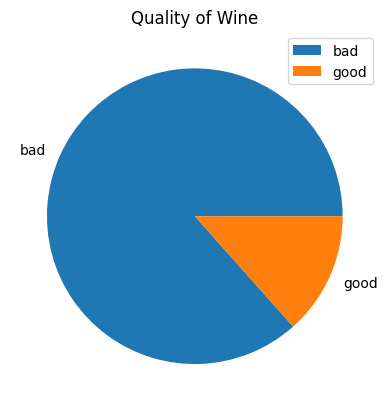

In [34]:
#Getting an idea of how many good/bad wines there are.

df['quality'].value_counts().plot(kind='pie')
plt.title('Quality of Wine')
plt.ylabel('')
plt.legend()
plt.show()

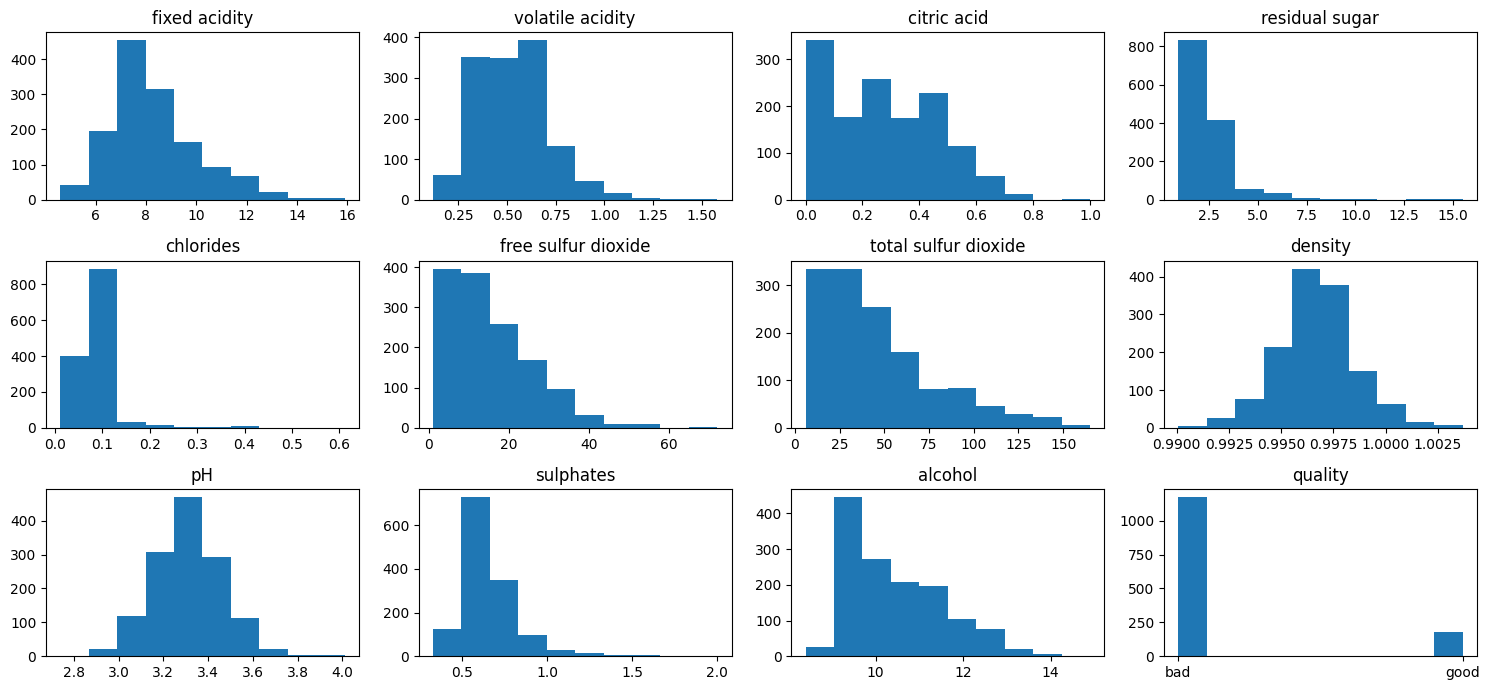

In [35]:
#Seeing the distribution of our features.

columns = df.columns

fig, ax = plt.subplots(3,4, figsize=(15, 7), layout='tight')

for ax, title in zip(ax.flat, columns):
    ax.hist(df[title])
    ax.set_title(title)

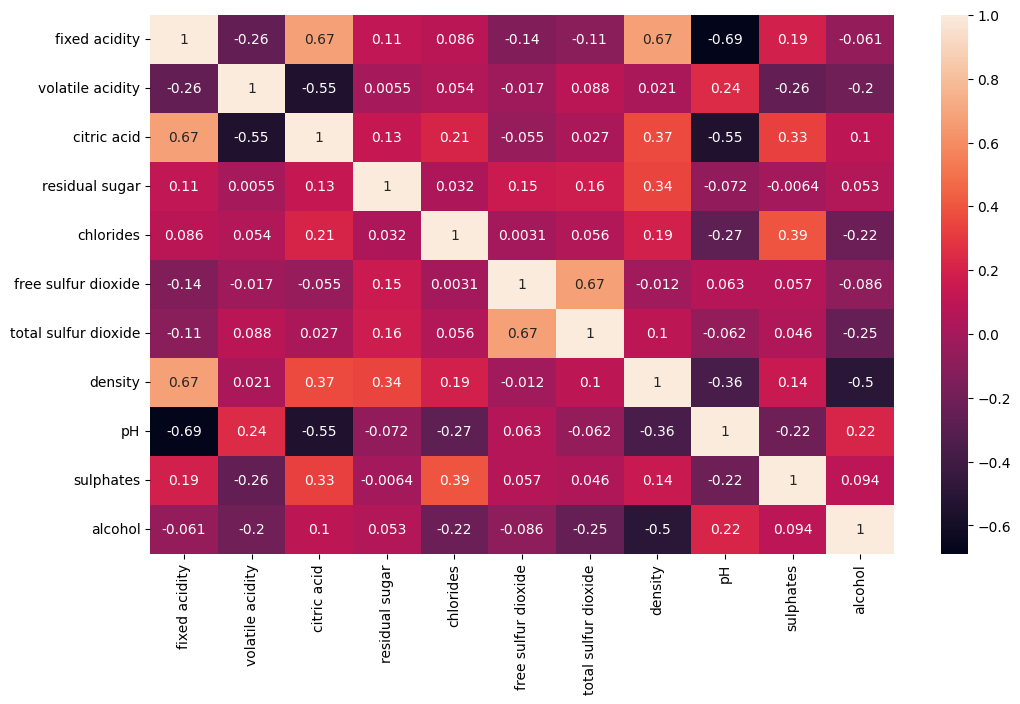

In [36]:
#Seeing the correlations of our features.

hm_df = df.drop(['quality'], axis=1)

fig, axs = plt.subplots(figsize=(12,7))

sns.heatmap(hm_df.corr(), annot=True)
plt.show()

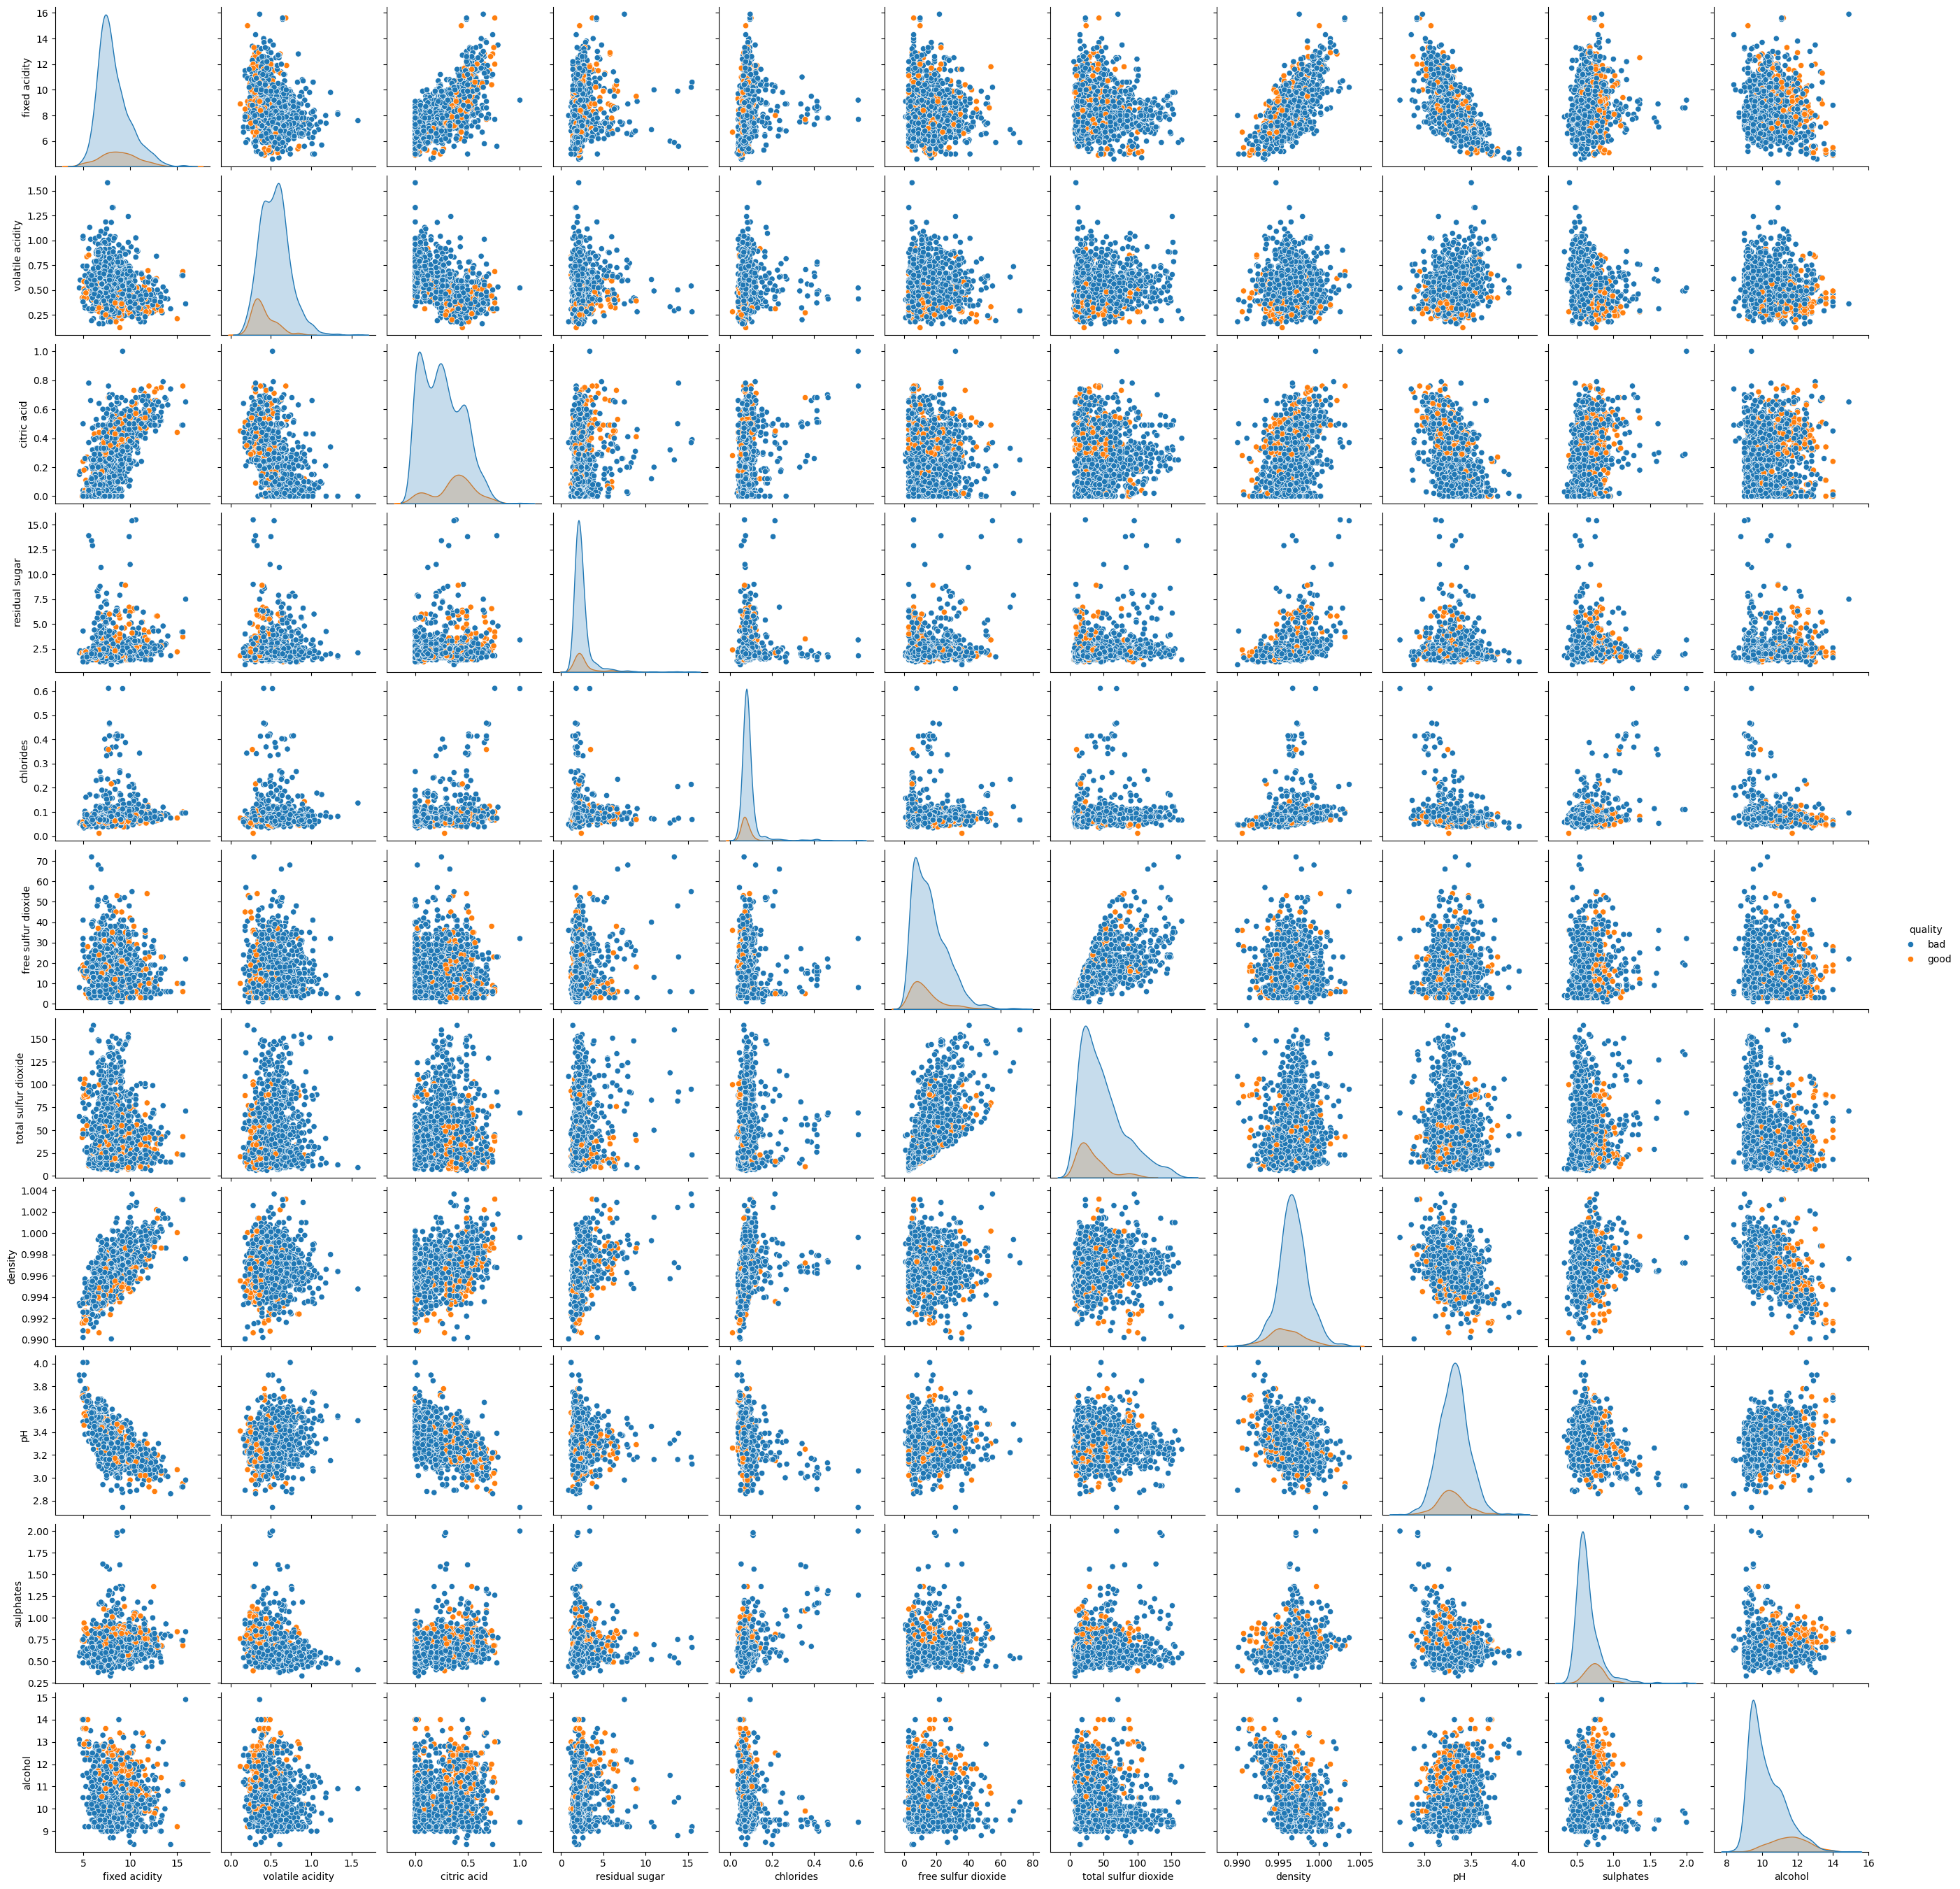

In [37]:
#Getting a better, more comprehensive idea of the relationship between our features and the outcome (quality).

sns.pairplot(df, hue='quality')
plt.show()